# Usage for perturbation due to different time delays (i.e. dispersion).

## The goal is to generate a function of the old roots and changes of the time delays ($\Delta T$'s) due to nonlinear effects that can be minimized to find the new roots. The new roots are assumed to be sufficiently close to the old roots.

In [1]:
import Potapov_Code.Potapov as Potapov
import Potapov_Code.Roots as Roots
import Potapov_Code.Time_Delay_Network as Time_Delay_Network
import Potapov_Code.functions as functions
import numpy as np
import numpy.testing as testing
import Potapov_Code.Hamiltonian as Hamiltonian

import numpy as np
import numpy.linalg as la
from scipy.integrate import ode
import scipy.constants as consts
import copy as cp

import matplotlib.pyplot as plt
import time
%pylab inline
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact
import pickle

##  One approach to perturbing the roots is to define a cost function in terms of real variables and minimize. This is done in Time_Delay_Network.get_minimizing_function_z and Hamiltonian.minimize_roots_z

In [280]:
Ex = Time_Delay_Network.Example3( max_linewidth=15.,max_freq=50.)
Ex.run_Potapov(commensurate_roots=True)
modes = Ex.spatial_modes
A,B,C,D = Ex.get_Potapov_ABCD(doubled=False)
ham = Hamiltonian.Hamiltonian(Ex.roots,modes,Ex.delays,Omega=-1j*A,
            nonlin_coeff = 1.)

In [281]:
chi_nonlin_test = Hamiltonian.Chi_nonlin(delay_indices=[0],start_nonlin=0,
                           length_nonlin=0.1*consts.c)
chi_nonlin_test.refraction_index_func = lambda freq, pol: 1. + 1e-1 * abs(freq / (np.pi))
ham.chi_nonlinearities.append(chi_nonlin_test)
ham.make_Delta_delays()

In [282]:
old_roots = cp.copy(ham.roots)

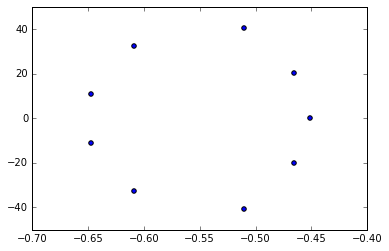

In [283]:
plt.scatter(np.asarray(old_roots).real,np.asarray(old_roots).imag)


In [6]:
func,dfunc = Ex.get_minimizing_function_z()

In [7]:
ham.minimize_roots_z(func,dfunc)

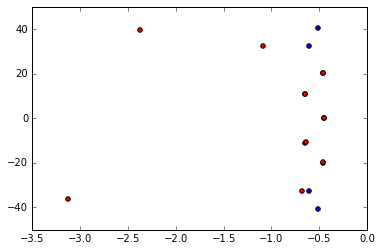

In [8]:
plt.scatter(np.asarray(old_roots).real,np.asarray(old_roots).imag,c = 'b')
plt.scatter(np.asarray(ham.roots).real,np.asarray(ham.roots).imag,c = 'r')
plt.show()

## Note: This does not always work so well! Instead, let's try using Newton's method below.

# Using Newton's method instead. This appears to work much better. See the widget below

In [7]:
Ex = Time_Delay_Network.Example3( max_linewidth=15.,max_freq=500.)
Ex.run_Potapov(commensurate_roots=True)  ## slow part
modes = Ex.spatial_modes
A,B,C,D = Ex.get_Potapov_ABCD(doubled=False)


In [8]:
roots = cp.copy(Ex.roots)

In [20]:
ham = Hamiltonian.Hamiltonian(roots,modes,Ex.delays,Omega=-1j*A,
            nonlin_coeff = 1.)
strength = 0.

In [21]:
def restart_ham(ham,strength):
    ham = Hamiltonian.Hamiltonian(roots,modes,Ex.delays,Omega=-1j*A,
                nonlin_coeff = 1.)
    chi_nonlin_test = Hamiltonian.Chi_nonlin(delay_indices=[0],start_nonlin=0,
                               length_nonlin=0.1*consts.c)

    strength = 0.
    chi_nonlin_test.refraction_index_func = lambda freq, pol: 1. + strength * abs(freq / (np.pi))
    ham.chi_nonlinearities = [chi_nonlin_test]
    return ham

In [22]:
def plot_with_refract_index(strength):
    ## This nonlinearity will depend on the frequency.
    ham.chi_nonlinearities[0].refraction_index_func = lambda freq, pol: 1. + strength * abs(freq / (np.pi))

    ## update delays, which are different becuase of the nonlinearity.

    perturb_func = Ex.get_frequency_pertub_func_z(use_ufuncify = True)
    ham.perturb_roots_z(perturb_func)

    plt.figure(figsize=(10,10))    
    plt.scatter(np.asarray(ham.roots).real,np.asarray(ham.roots).imag)
    plt.show()


In [23]:
def perturb_roots(strength):
    ## This nonlinearity will depend on the frequency.
    ham.chi_nonlinearities[0].refraction_index_func = lambda freq, pol: 1. + strength * abs(freq / (np.pi))
    perturb_func = Ex.get_frequency_pertub_func_z(use_ufuncify = True)
    ham.perturb_roots_z(perturb_func)


In [10]:
def plot_roots(roots):
    plt.figure(figsize=(10,10))    
    plt.scatter(np.asarray(roots).real,np.asarray(roots).imag)
    plt.show()

In [25]:
ham = restart_ham(ham,strength)

root adjustment converged!


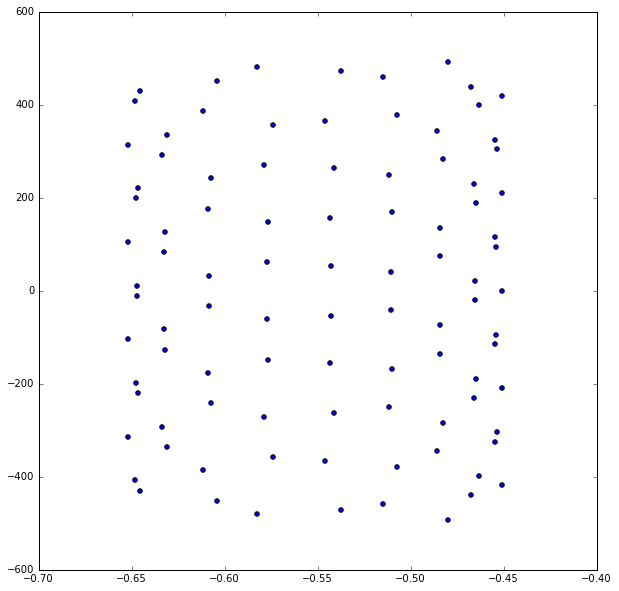

In [27]:
plot_with_refract_index(1e-4)

# Next we make a widget to view different strengths of the nonlinearity.

In [29]:
ham = restart_ham(ham,strength)

In [8]:
stepping_tuple = (0,100,1) #start, end, step

In [38]:
def make_roots_data((start,end,step)):
    retrieve_roots = {}
    current = start
    while current <= end:
        perturb_roots(current* 5e-5)
        retrieve_roots[current] = cp.deepcopy(ham.roots)
        current += step
    return retrieve_roots

In [39]:
retrieve_roots = make_roots_data(stepping_tuple)

root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
root adjustment converged!
r

In [6]:
F = lambda strength: plot_roots(retrieve_roots[strength])

In [13]:
x_plot = np.linspace(-500,500,500)

In [35]:
y_plot1 = map((lambda freq : 1. + 5e-3 * abs(freq / (np.pi))),x_plot)
y_plot2 = map((lambda freq : 1. + 5e-4 * abs(freq / (np.pi))),x_plot)
y_plot3 = map((lambda freq : 1. + 5e-5 * abs(freq / (np.pi))),x_plot)

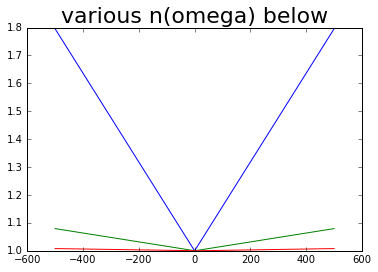

In [38]:
plt.title('various n(omega) below',fontsize=22)
plt.plot(x_plot,y_plot1)
plt.plot(x_plot,y_plot2)
plt.plot(x_plot,y_plot3)
plt.show()

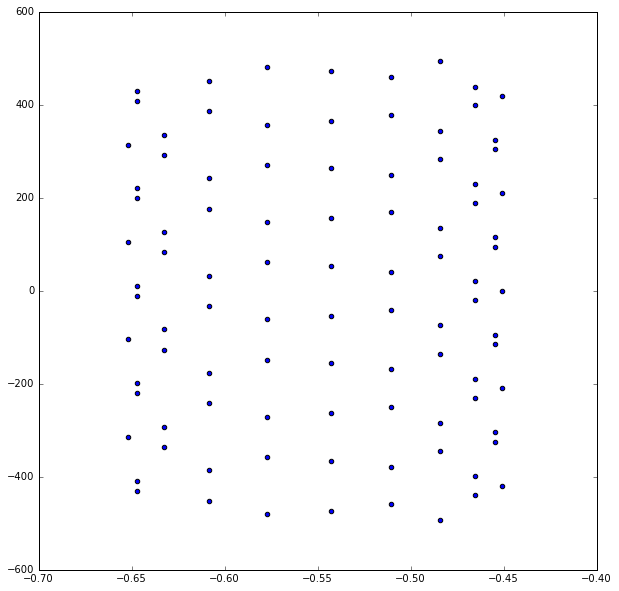

In [4]:
interact(F, strength=stepping_tuple)

## Saving and loading for later

In [44]:
## saving

with open('scatterplots/100_roots.pickle', 'wb') as handle:
  pickle.dump(retrieve_roots, handle)

In [3]:
## opening

from ipywidgets import interact
import pickle

stepping_tuple = (0,100,1) #start, end, step
F = lambda strength: plot_roots(retrieve_roots[strength])

def plot_roots(roots):
    plt.figure(figsize=(10,10))    
    plt.scatter(np.asarray(roots).real,np.asarray(roots).imag)
    plt.show()

with open('scatterplots/100_roots.pickle', 'rb') as handle:
  retrieve_roots = pickle.load(handle)
